### Contents
A Model Without an Activation Function<br>
&emsp;Linear Example<br>
&emsp;Quadratic Example<br>


In [4]:
from typing import List

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch import Tensor


### A Model without an Activation Function

In [58]:
def create_linear_data(weight:float, bias: float) -> tuple[List[float], List[float]]:
    X = [float(x) for x in range(-10, 10)]
    y = [weight*x+bias for x in X]
    X, y = np.array(X, dtype=np.float32), np.array(y, np.float32)
    X = np.reshape(X, (len(X), 1))
    y = np.reshape(y, (len(y), 1))
    return X, y

# We need to reshape X and y so that each row is a single feature/label.
# This is needed for training.
X_train, y_train = create_linear_data(5, 9)

print('X_train Dimenstions:',X_train.ndim)
print('X_train Shape:', X_train.shape)
print(X_train[:2])

print('y_train Dimenstions:',y_train.ndim)
print('y_train Shape:', y_train.shape)
print(y_train[:2])

X_train Dimenstions: 2
X_train Shape: (20, 1)
[[-10.]
 [ -9.]]
y_train Dimenstions: 2
y_train Shape: (20, 1)
[[-41.]
 [-36.]]


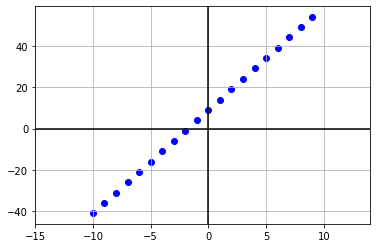

In [38]:
def plot_data(x: np.ndarray, y1: np.ndarray, y2: np.ndarray=None) -> None:
    ax = plt.subplots()[1]
    ax.set_xlim(x.min()-5, x.max()+5)
    ax.set_ylim(y1.min()-5, y1.max()+5)
    plt.scatter(x, y1, color='blue')
    if not y2 is None:
        ax.scatter(x, y2, color='red')
    plt.grid(True)
    plt.axhline(color='black')
    plt.axvline(color='black')

plot_data(X_train, y_train)

Design the Model

In [ ]:
class LinearRegressionModel(nn.Module):

    def __init__(self):
        super(LinearRegressionModel, self).__init__()

        self.linear1 = nn.Linear(1, 1, bias=True)

    def forward(self, input, log=False):
        l1 = self.linear1(input)
        if log:
            print('\nLinear 1:', l1, l1.shape)
        return l1


Test the Model with a Single Prediction

In [ ]:
model = LinearRegressionModel()
X = torch.tensor([1], dtype=torch.float32)
prediction = model(X, log=True)
print(X)
print(prediction)

Create a Training Function

In [72]:

# When you have a large number of iterations over a small training set you are basically
# memorizing your training set.

EPOCHS = 100
LR = 0.001

def train_model(model: nn.Module, X_train, y_train) -> tuple[nn.Module, List]:
    torch.manual_seed(42)
    losses = []
    loss_function = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=LR)

    for epoch in range(EPOCHS):
        total_loss = 0
        for X, y in zip(X_train, y_train):

            # Wrap in tensors
            X_tensor = torch.from_numpy(X)
            y_tensor = torch.from_numpy(y)
            
            # Pytorch accumulates gradients so before passing in a new
            # context (features) you need to zero out the gradients from the 
            # previous context.
            model.zero_grad()
            optimizer.zero_grad()

            # Forward pass - this will get log probabilities for every word 
            # in our vocabulary which is now represented as embeddings.
            prediction = model(X_tensor)

            # Compute the loss.
            # target has to be a list for some reason.
            loss = loss_function(prediction, y_tensor)

            # Backward pass to update the gradients.
            loss.backward()

            # Optimize the parameters
            optimizer.step()

            # Get the loss for this context.
            total_loss += loss.item()
            
        # Save the total loss for this epoch.
        losses.append(total_loss)

    return model, losses

In [12]:
def print_results(model: nn.Module, losses: list) -> None:
    # Print the losses of every 10th epoch.
    for epoch in range(0, EPOCHS, 10):
        print(epoch, ':', losses[epoch])
    # This will print the very last epoch so we can see the
    # final loss value.
    print(EPOCHS-1, ':', losses[EPOCHS-1])

    for name, parameter in model.named_parameters():
        print(name, parameter.data)

In [ ]:

model = LinearRegressionModel()
model, losses = train_model(model, X_train, y_train)

# The loss should decrease with every iteration (epoch) over the training data.
print_results(model, losses)

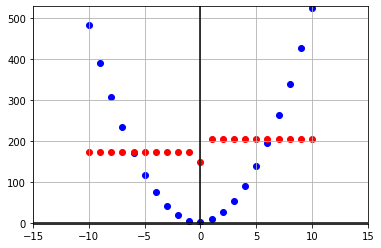

In [76]:
predictions = [model(torch.from_numpy(X)).detach().item() for X in X_train]

plot_data(np.array(X_train), np.array(y_train), np.array(predictions))

In [61]:
print(y_train)
print(predictions)

[[-41.]
 [-36.]
 [-31.]
 [-26.]
 [-21.]
 [-16.]
 [-11.]
 [ -6.]
 [ -1.]
 [  4.]
 [  9.]
 [ 14.]
 [ 19.]
 [ 24.]
 [ 29.]
 [ 34.]
 [ 39.]
 [ 44.]
 [ 49.]
 [ 54.]]
[-41.0000114440918, -36.0000114440918, -31.000009536743164, -26.00000762939453, -21.000009536743164, -16.00000762939453, -11.000008583068848, -6.000008583068848, -1.0000073909759521, 3.999992847442627, 8.999992370605469, 13.999994277954102, 18.9999942779541, 23.9999942779541, 28.99999237060547, 33.999996185302734, 38.999996185302734, 43.999996185302734, 48.999996185302734, 53.999996185302734]


### A Quadratic Example

In [64]:
def create_quadratic_data(a:float, b: float, c:float) -> tuple[List[float], List[float]]:
    X = [float(x) for x in range(-10, 11)]
    y = [a*(x**2)+(b*x)+c for x in X]
    X, y = np.array(X, dtype=np.float32), np.array(y, np.float32)
    X = np.reshape(X, (len(X), 1))
    y = np.reshape(y, (len(y), 1))
    return X, y

X_train, y_train = create_quadratic_data(5, 2, 3)

print('X_train Dimenstions:',X_train.ndim)
print('X_train Shape:', X_train.shape)
print(X_train[:2])

print('y_train Dimenstions:',y_train.ndim)
print('y_train Shape:', y_train.shape)
print(y_train[:2])

X_train Dimenstions: 2
X_train Shape: (21, 1)
[[-10.]
 [ -9.]]
y_train Dimenstions: 2
y_train Shape: (21, 1)
[[483.]
 [390.]]


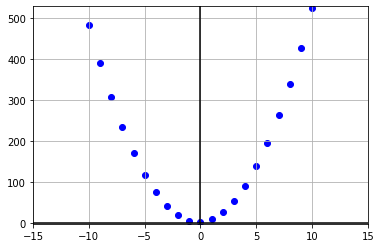

In [70]:
plot_data(X_train, y_train)

In [77]:
class NewModel(nn.Module):

    def __init__(self):
        super(NewModel, self).__init__()

        self.linear1 = nn.Linear(1, 5, bias=True)
        self.relu = nn.PReLU()  # Rectified Linear Unit Function
        self.linear2 = nn.Linear(5, 1, bias=True)
        #self.linear3 = nn.Linear(1, 1, bias=True)

    def forward(self, input, log=False):
        l1 = self.linear1(input)
        rect = self.relu(l1)
        l2 = self.linear2(rect)
        if log:
            print('\nLinear 1:', l1, l1.shape)
            print('\nReLU:', rect, rect.shape)
            print('\nLinear 2:', l2, l2.shape)
        return l2


In [67]:
model = NewModel()
X = torch.tensor([1], dtype=torch.float32)
prediction = model(X, log=True)
print(X)
print(prediction)


Linear 1: tensor([ 0.9663,  0.3432,  0.3530,  1.8002, -0.9527], grad_fn=<AddBackward0>) torch.Size([5])

ReLU: tensor([0.9663, 0.3432, 0.3530, 1.8002, 0.0000], grad_fn=<ReluBackward0>) torch.Size([5])

Linear 2: tensor([0.5669], grad_fn=<AddBackward0>) torch.Size([1])
tensor([1.])
tensor([0.5669], grad_fn=<AddBackward0>)


In [78]:
model = NewModel()
model, losses = train_model(model, X_train, y_train)

# The loss should decrease with every iteration (epoch) over the training data.
print_results(model, losses)

0 : nan
10 : nan
20 : nan
30 : nan
40 : nan
50 : nan
60 : nan
70 : nan
80 : nan
90 : nan
99 : nan
linear1.weight tensor([[nan],
        [nan],
        [nan],
        [nan],
        [nan]])
linear1.bias tensor([nan, nan, nan, nan, nan])
relu.weight tensor([nan])
linear2.weight tensor([[nan, nan, nan, nan, nan]])
linear2.bias tensor([nan])


In [ ]:
activations = {
    'ELU': nn.ELU(),
    'Hardshrink': nn.Hardshrink(),
    'Hardsigmoin': nn.Hardsigmoid(),
    'Hardswish': nn.Hardswish(),
    'Hardtanh': nn.Hardtanh(),
    'LeadkyReLU': nn.LeakyReLU(),
    'LogSigmoid': nn.LogSigmoid(),
    'MultiheadAttention': nn.MultiheadAttention(),
    'PReLU': nn.PReLU()

}